## 1) Import Packages

In [1]:
#Refer Stu_Voice Day2 Classification
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

Mention about the 6 state indicators (3 components), approach1, source data refernce, approach2 below, 

## 2) Load Dataset

In [2]:

ela1 = pd.read_csv(os.path.join('/Users/sesamuel/Documents/Proj3/StudentAnalytics/csv/ela38download2017f.csv'))                     
math1 = pd.read_csv(os.path.join('/Users/sesamuel/Documents/Proj3/StudentAnalytics/csv/math38download2017f.csv'))                     

In [3]:
ela1.shape

(121959, 25)

In [4]:
math1.shape

(121910, 25)

## 3) Data Preparation 

In [5]:
ela1.columns

Index(['cds', 'rtype', 'schoolname', 'districtname', 'countyname',
       'charter_flag', 'coe_flag', 'studentgroup', 'currdenom', 'currstatus',
       'priordenom', 'priorstatus', 'change', 'statuslevel', 'changelevel',
       'color', 'box', 'caa_denom', 'caa_level1_num', 'caa_level1_pct',
       'caa_level2_num', 'caa_level2_pct', 'caa_level3_num', 'caa_level3_pct',
       'reportingyear'],
      dtype='object')

In [6]:
ela1.dtypes

cds                 int64
rtype              object
schoolname         object
districtname       object
countyname         object
charter_flag       object
coe_flag          float64
studentgroup       object
currdenom           int64
currstatus        float64
priordenom          int64
priorstatus       float64
change            float64
statuslevel         int64
changelevel         int64
color               int64
box                 int64
caa_denom         float64
caa_level1_num    float64
caa_level1_pct    float64
caa_level2_num    float64
caa_level2_pct    float64
caa_level3_num    float64
caa_level3_pct    float64
reportingyear      object
dtype: object

In [7]:
math1.columns

Index(['cds', 'rtype', 'schoolname', 'districtname', 'countyname',
       'charter_flag', 'coe_flag', 'studentgroup', 'currdenom', 'currstatus',
       'priordenom', 'priorstatus', 'change', 'statuslevel', 'changelevel',
       'color', 'box', 'caa_denom', 'caa_level1_num', 'caa_level1_pct',
       'caa_level2_num', 'caa_level2_pct', 'caa_level3_num', 'caa_level3_pct',
       'reportingyear'],
      dtype='object')

In [8]:
 # Merge the two DataFrames together based on the cds they share
acadperft = pd.merge(ela1, math1, on="cds")
acadperft.head()

,cds,rtype_x,schoolname_x,districtname_x,countyname_x,charter_flag_x,coe_flag_x,studentgroup_x,currdenom_x,currstatus_x,...,color_y,box_y,caa_denom_y,caa_level1_num_y,caa_level1_pct_y,caa_level2_num_y,caa_level2_pct_y,caa_level3_num_y,caa_level3_pct_y,reportingyear_y
0,1100170123968,S,Community School for Creative Education,Alameda County Office of Education,Alameda,Y,NaN,AA,12,-131.2,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017f
1,1100170123968,S,Community School for Creative Education,Alameda County Office of Education,Alameda,Y,NaN,AA,12,-131.2,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017f
2,1100170123968,S,Community School for Creative Education,Alameda County Office of Education,Alameda,Y,NaN,AA,12,-131.2,...,2,180,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017f
3,1100170123968,S,Community School for Creative Education,Alameda County Office of Education,Alameda,Y,NaN,AA,12,-131.2,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017f
4,1100170123968,S,Community School for Creative Education,Alameda County Office of Education,Alameda,Y,NaN,AA,12,-131.2,...,3,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017f


In [9]:
acadperft.shape

(1805242, 49)

In [10]:
 # TEST Left Merge the two DataFrames together based on the cds they share
acadperftl = pd.merge(ela1, math1, on="cds", how='left')
acadperftl.shape

(1805255, 49)

In [11]:
 # TEST RIGHT Merge the two DataFrames together based on the cds they share
acadperftr = pd.merge(ela1, math1, on="cds", how='right')
acadperftr.shape

(1805250, 49)

In [12]:
 # TEST OUTER Merge the two DataFrames together based on the cds they share
acadperfto = pd.merge(ela1, math1, on="cds", how='outer')
acadperfto.shape

(1805263, 49)

In [13]:
# Extract 
acadperfte_df = acadperft.loc[:, ["cds", "schoolname_x", "districtname_x","countyname_x","studentgroup_x",
                 "statuslevel_x","changelevel_x", "color_x", "box_x", "reportingyear_x",
"schoolname_y", "districtname_y","countyname_y","studentgroup_y",
                 "statuslevel_y","changelevel_y", "color_y", "box_y", "reportingyear_y"]]
acadperfte_df.head()

,cds,schoolname_x,districtname_x,countyname_x,studentgroup_x,statuslevel_x,changelevel_x,color_x,box_x,reportingyear_x,schoolname_y,districtname_y,countyname_y,studentgroup_y,statuslevel_y,changelevel_y,color_y,box_y,reportingyear_y
0,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,2017f,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,2,5,0,0,2017f
1,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,2017f,Community School for Creative Education,Alameda County Office of Education,Alameda,AI,0,0,0,0,2017f
2,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,2017f,Community School for Creative Education,Alameda County Office of Education,Alameda,ALL,2,3,2,180,2017f
3,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,2017f,Community School for Creative Education,Alameda County Office of Education,Alameda,AS,0,0,0,0,2017f
4,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,2017f,Community School for Creative Education,Alameda County Office of Education,Alameda,EL,2,5,3,200,2017f


In [14]:
# Rename columns so that they are differentiated
acadperfte_df= acadperfte_df.rename(columns={"schoolname_x": "ELA_Schoolname", "districtname_x": "ELA_Districtname", "countyname_x": "ELA_Countyname",
            "studentgroup_x": "ELA_Studentgroup", "statuslevel_x": "ELA_Statuslevel", "changelevel_x": "ELA_Changelevel",
            "color_x": "ELA_Color", "box_x": "ELA_Box", "reportingyear_x": "ELA_Reportingyear"})

acadperfte_df = acadperfte_df.rename(columns={"schoolname_y": "MATH_Schoolname", "districtname_y": "MATH_Districtname", "countyname_y": "MATH_Countyname",
            "studentgroup_y": "MATH_Studentgroup", "statuslevel_y": "MATH_Statuslevel", "changelevel_y": "MATH_Changelevel",
            "color_y": "MATH_Color", "box_y": "MATH_Box", "reportingyear_y": "MATH_Reportingyear"})

acadperfte_df.columns

Index(['cds', 'ELA_Schoolname', 'ELA_Districtname', 'ELA_Countyname',
       'ELA_Studentgroup', 'ELA_Statuslevel', 'ELA_Changelevel', 'ELA_Color',
       'ELA_Box', 'ELA_Reportingyear', 'MATH_Schoolname', 'MATH_Districtname',
       'MATH_Countyname', 'MATH_Studentgroup', 'MATH_Statuslevel',
       'MATH_Changelevel', 'MATH_Color', 'MATH_Box', 'MATH_Reportingyear'],
      dtype='object')

In [15]:
acadperfte_df.dtypes

cds                    int64
ELA_Schoolname        object
ELA_Districtname      object
ELA_Countyname        object
ELA_Studentgroup      object
ELA_Statuslevel        int64
ELA_Changelevel        int64
ELA_Color              int64
ELA_Box                int64
ELA_Reportingyear     object
MATH_Schoolname       object
MATH_Districtname     object
MATH_Countyname       object
MATH_Studentgroup     object
MATH_Statuslevel       int64
MATH_Changelevel       int64
MATH_Color             int64
MATH_Box               int64
MATH_Reportingyear    object
dtype: object

## 4) Create a performance label

In [16]:
# Create a categorical label from Color # Good:15~20 Fair:10~14 Poor:0~9
acadperfte_df['perf'] = 'na'
acadperfte_df.loc[(acadperfte_df.ELA_Color >= 4) , 'perf'] = 'High' 
acadperfte_df.loc[(acadperfte_df.ELA_Color >= 3) & (acadperfte_df.ELA_Color < 4) , 'perf'] = 'Mid' 
acadperfte_df.loc[(acadperfte_df.ELA_Color >= 0) & (acadperfte_df.ELA_Color <= 2) , 'perf'] = 'Low' 
acadperfte_df.loc[(acadperfte_df.MATH_Color >= 4) , 'perf'] = 'High' 
acadperfte_df.loc[(acadperfte_df.MATH_Color >= 3) & (acadperfte_df.MATH_Color < 4) , 'perf'] = 'Mid' 
acadperfte_df.loc[(acadperfte_df.MATH_Color >= 0) & (acadperfte_df.MATH_Color <= 2) , 'perf'] = 'Low' 
acadperfte_df.head(2)

,cds,ELA_Schoolname,ELA_Districtname,ELA_Countyname,ELA_Studentgroup,ELA_Statuslevel,ELA_Changelevel,ELA_Color,ELA_Box,ELA_Reportingyear,MATH_Schoolname,MATH_Districtname,MATH_Countyname,MATH_Studentgroup,MATH_Statuslevel,MATH_Changelevel,MATH_Color,MATH_Box,MATH_Reportingyear,perf
0,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,2017f,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,2,5,0,0,2017f,Low
1,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,2017f,Community School for Creative Education,Alameda County Office of Education,Alameda,AI,0,0,0,0,2017f,Low


In [17]:
acadperfte_df['ELA_Color'].value_counts()

0    1132111
2     256645
3     150987
4     124966
1      88064
5      52469
Name: ELA_Color, dtype: int64

In [18]:
acadperfte_df['MATH_Color'].value_counts()

0    1132690
2     241446
3     176773
4     120905
1      76286
5      57142
Name: MATH_Color, dtype: int64

## 5) Handling Missing values

In [19]:
# look for missing values
acadperfte_df.isnull().any()

cds                   False
ELA_Schoolname         True
ELA_Districtname      False
ELA_Countyname        False
ELA_Studentgroup      False
ELA_Statuslevel       False
ELA_Changelevel       False
ELA_Color             False
ELA_Box               False
ELA_Reportingyear     False
MATH_Schoolname        True
MATH_Districtname     False
MATH_Countyname       False
MATH_Studentgroup     False
MATH_Statuslevel      False
MATH_Changelevel      False
MATH_Color            False
MATH_Box              False
MATH_Reportingyear    False
perf                  False
dtype: bool

In [20]:
acadperfte_df.shape

(1805242, 20)

In [21]:
# making new data frame with dropped NA values 
new_datat1 = acadperfte_df.dropna(axis = 0, how ='any')

In [22]:
new_datat1.shape

(1614245, 20)

In [23]:
new_datat1['ELA_Color'].value_counts()

0    1036147
2     217477
3     131688
4     107171
1      76589
5      45173
Name: ELA_Color, dtype: int64

In [24]:
#High number of Color=0 could give mostly poor perf , selecting rest
new_datat2=new_datat1[new_datat1.ELA_Color != 0]
new_datat2['ELA_Color'].value_counts()

2    217477
3    131688
4    107171
1     76589
5     45173
Name: ELA_Color, dtype: int64

In [25]:
new_datat1['MATH_Color'].value_counts()

0    1036651
2     202442
3     153937
4     105092
1      66475
5      49648
Name: MATH_Color, dtype: int64

In [26]:
#High number of Color=0 could give mostly poor perf , selecting rest
new_datat2=new_datat1[new_datat1.MATH_Color != 0]
new_datat2['MATH_Color'].value_counts()

2    202442
3    153937
4    105092
1     66475
5     49648
Name: MATH_Color, dtype: int64

In [27]:
# making new data frame with dropped NA values 
# look for missing values
new_datat2.isnull().any()

cds                   False
ELA_Schoolname        False
ELA_Districtname      False
ELA_Countyname        False
ELA_Studentgroup      False
ELA_Statuslevel       False
ELA_Changelevel       False
ELA_Color             False
ELA_Box               False
ELA_Reportingyear     False
MATH_Schoolname       False
MATH_Districtname     False
MATH_Countyname       False
MATH_Studentgroup     False
MATH_Statuslevel      False
MATH_Changelevel      False
MATH_Color            False
MATH_Box              False
MATH_Reportingyear    False
perf                  False
dtype: bool

In [28]:
new_datat2.shape

(577594, 20)

## 6)Exploratory Data Analysis

Text(0.5,1,'Correlation Heatmap')

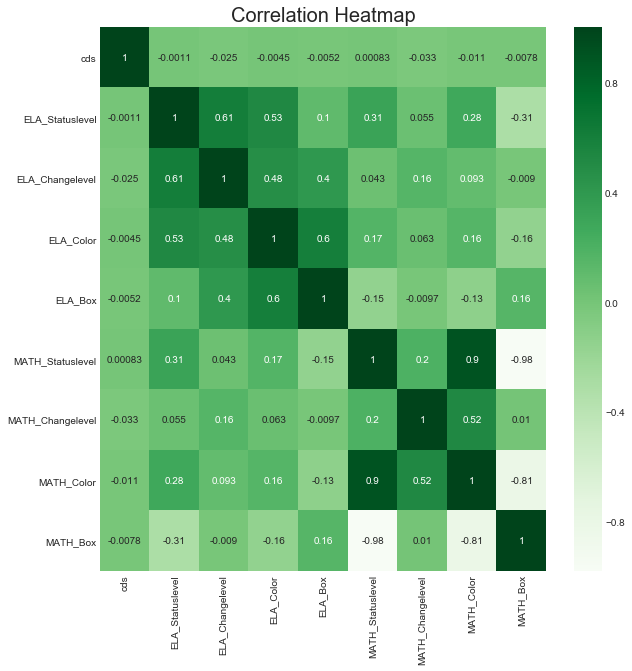

In [29]:
# see correlation between variables through a correlation heatmap
corr = new_datat2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Greens")
plt.title('Correlation Heatmap', fontsize=20)

Looking at ELA , as you move from left to right(MATH) corr decrease . This could be due to diff scores applied for ELA and Math. 
Also ELA_Color is based of ELA_Statuslevel and ELA_Changelevel.From above we see that there is a high correlation between ELA_Color and ELS_Statuslevel (0.53)
Ref: Table 9: Grade Five Scale Score Range for ELA and Mathematics

## Hypothesis Testing also confirms that ELS_Statuslevel has a significant correlation with perfnum_label

In [30]:
# Create a categorical label from Color 
new_datat2['label'] = 'no'
new_datat2.loc[(new_datat2.perf != 'Low') , 'label'] = 'yes'  
new_datat2.head(2)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,cds,ELA_Schoolname,ELA_Districtname,ELA_Countyname,ELA_Studentgroup,ELA_Statuslevel,ELA_Changelevel,ELA_Color,ELA_Box,ELA_Reportingyear,...,MATH_Districtname,MATH_Countyname,MATH_Studentgroup,MATH_Statuslevel,MATH_Changelevel,MATH_Color,MATH_Box,MATH_Reportingyear,perf,label
2,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,2017f,...,Alameda County Office of Education,Alameda,ALL,2,3,2,180,2017f,Low,no
4,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,2017f,...,Alameda County Office of Education,Alameda,EL,2,5,3,200,2017f,Mid,yes


In [31]:
# Create a categorical label from Color  - perf_flg
#0/1 - perfflg - ignore
#new_datat2['perfflg'] = 0
#new_datat2.loc[(new_datat2.perf != 'Low') , 'perfflg'] = 1 
#new_datat2.head(2)
new_datat2['label'].str.contains('yes').head()

2     False
4      True
8     False
11     True
16    False
Name: label, dtype: bool

In [32]:
#before getting binary value for perfflg
new_datat2.dtypes

cds                    int64
ELA_Schoolname        object
ELA_Districtname      object
ELA_Countyname        object
ELA_Studentgroup      object
ELA_Statuslevel        int64
ELA_Changelevel        int64
ELA_Color              int64
ELA_Box                int64
ELA_Reportingyear     object
MATH_Schoolname       object
MATH_Districtname     object
MATH_Countyname       object
MATH_Studentgroup     object
MATH_Statuslevel       int64
MATH_Changelevel       int64
MATH_Color             int64
MATH_Box               int64
MATH_Reportingyear    object
perf                  object
label                 object
dtype: object

In [33]:
#Logistic regression gives binary outcome - Convert perf_flg to binary value 
new_datat2['label'].str.contains('yes').astype(int).head()

2     0
4     1
8     0
11    1
16    0
Name: label, dtype: int64

In [34]:
perc = (lambda col: col/col.sum())
index = ['Low','Mid','High']
hypo_tab11 = pd.crosstab(index=new_datat2.label, columns=new_datat2.ELA_Statuslevel)
hypo_tab = np.log(hypo_tab11)
hypo_perc = hypo_tab.apply(perc).reindex(index)

In [35]:
# chi-square test result -- significant ran below so place up!
import statsmodels.api as sm
hypo_table = sm.stats.Table(hypo_tab11)
hypo_rslt = hypo_table.test_nominal_association()
hypo_rslt.pvalue

0.0

When you perform a hypothesis test in statistics, a p-value helps you determine the significance of your results. The p-value is a number between 0 and 1 and interpreted in the following way: A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis

## 6a)Check Overall Performance 

Text(0,0.5,'Number of Schools')

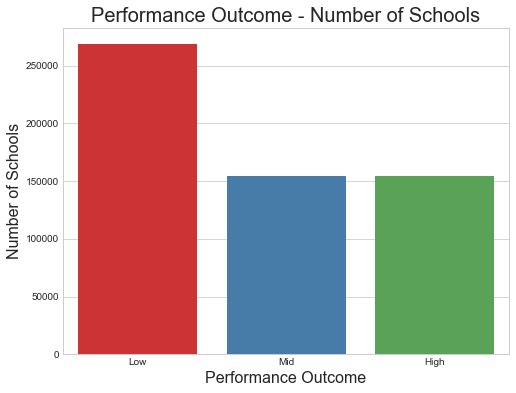

In [36]:
# Performance Outcome Countplot - Schools
plt.figure(figsize=(8,6))
sns.countplot(new_datat2.perf, order=["Low","Mid","High"], palette='Set1')
plt.title('Performance Outcome - Number of Schools',fontsize=20)
plt.xlabel('Performance Outcome', fontsize=16)
plt.ylabel('Number of Schools', fontsize=16)

since the above picture showed higher overall low performance, running further analysis to see a much granular level- district/school/student group 

## 6b1)Check ELA performance for a specific district 

In [37]:
#Selecting district1
district1=new_datat2[new_datat2.ELA_Districtname == 'Capistrano Unified']
district1['ELA_Districtname'].value_counts()

Capistrano Unified    4480
Name: ELA_Districtname, dtype: int64

In [38]:
#unique values in a coulmn
dist1_unq=district1['ELA_Districtname'].nunique()
dist1_unq

1

In [39]:
#count distinct values in single column
dist1sch_cnt=district1['ELA_Schoolname'].nunique()
dist1sch_cnt

51

In [40]:
#Show the list of District1 schools
D1_Schools = district1['ELA_Schoolname'].unique()
D1_Schools.sort()
D1_Schools

array(['Aliso Viejo Middle', 'Arroyo Vista Elementary',
       'Arroyo Vista Middle', 'Bathgate Elementary',
       'Bernice Ayer Middle', 'Canyon Vista Elementary',
       'Capistrano Connections Academy', 'Capistrano Virtual/Home',
       'Carl Hankey Elementary', 'Carl Hankey Middle',
       'Castille Elementary', 'Chaparral Elementary',
       'Clarence Lobo Elementary', 'Community Roots Academy',
       'Concordia Elementary', 'Del Obispo Elementary',
       'Don Juan Avila Elementary', 'Don Juan Avila Middle',
       'George White Elementary', 'Harold Ambuehl Elementary',
       'Hidden Hills Elementary', 'John Malcom Elementary', 'Journey',
       'Kinoshita Elementary', 'Ladera Ranch Elementary',
       'Ladera Ranch Middle', 'Laguna Niguel Elementary',
       'Las Flores Elementary', 'Las Flores Middle',
       'Las Palmas Elementary', 'Marblehead Elementary',
       'Marco Forster Middle', 'Marian Bergeson Elementary',
       'Moulton Elementary', 'Newhart Middle', 'Niguel Hi

Text(0,0.5,'District1')

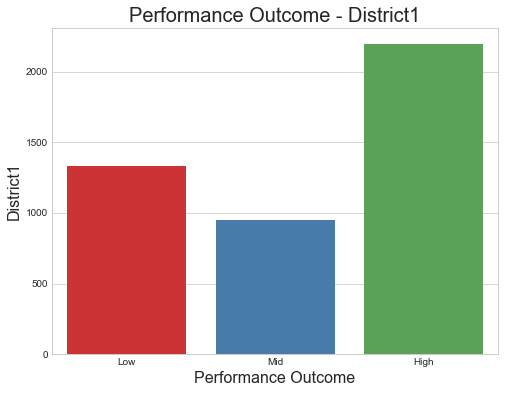

In [41]:
# ELA Performance Outcome Countplot - District1
plt.figure(figsize=(8,6))
sns.countplot(district1.perf, order=["Low","Mid","High"], palette='Set1')
plt.title('Performance Outcome - District1',fontsize=20)
plt.xlabel('Performance Outcome', fontsize=16)
plt.ylabel('District1', fontsize=16)

In spite of overall low performance, when we look at specific school it showed high performance followed by higher low performance noted.

## 6b2)Check ELA performance for a another specific district 

In [42]:
#District2 - Irvine Unified
district2=new_datat2[new_datat2.ELA_Districtname == 'Irvine Unified']
district2['ELA_Districtname'].value_counts()

Irvine Unified    3229
Name: ELA_Districtname, dtype: int64

Text(0,0.5,'District2')

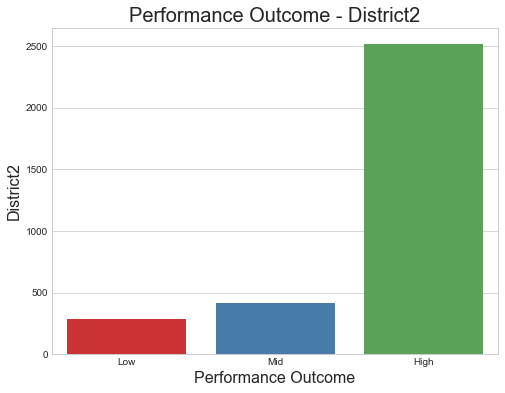

In [43]:
# ELA Performance Outcome Countplot - District2
plt.figure(figsize=(8,6))
sns.countplot(district2.perf, order=["Low","Mid","High"], palette='Set1')
plt.title('Performance Outcome - District2',fontsize=20)
plt.xlabel('Performance Outcome', fontsize=16)
plt.ylabel('District2', fontsize=16)

From above figure district2 is exceptionally good!

# 6c)Check ELA for a specific school

In [44]:
school1=new_datat2[new_datat2.ELA_Schoolname == 'Wood Canyon Elementary']
school1['ELA_Schoolname'].value_counts()

Wood Canyon Elementary    84
Name: ELA_Schoolname, dtype: int64

Text(0,0.5,'School1')

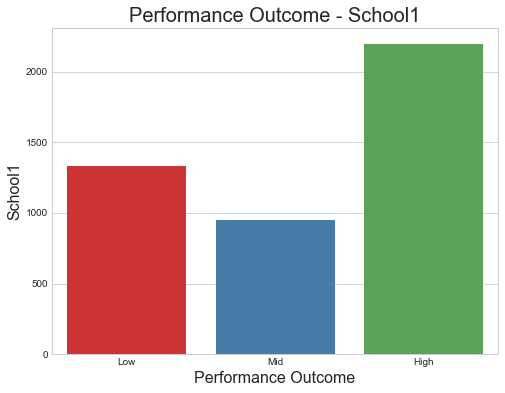

In [45]:
# ELA Performance Outcome Countplot - School1
plt.figure(figsize=(8,6))
sns.countplot(district1.perf, order=["Low","Mid","High"], palette='Set1')
plt.title('Performance Outcome - School1',fontsize=20)
plt.xlabel('Performance Outcome', fontsize=16)
plt.ylabel('School1', fontsize=16)

## 6d)Check ELA performance under specific student group

ALL=All Students
AA=Black/African American
AI=American Indian or Alaska Native
AS=Asian
FI=Filipino
HI=Hispanic
PI=Pacific Islander
WH=White
MR=Multiple Races/Two or More
EL=English Learner
ELO=English Learners Only RFP=RFEPs Only 
EO=English Only
SED=Socioeconomically Disadvantaged
SWD=Students with Disabilities
FOS=Foster Youth
HOM=Homeless Youth

In [46]:
stdgrp_array = ['HI', 'AS']
stdgrp1=new_datat2.loc[new_datat2['ELA_Studentgroup'].isin(stdgrp_array)]
#stdgrp1=new_datat2[new_datat2.ELA_Studentgroup == 'EL']
stdgrp1['ELA_Studentgroup'].value_counts()

HI    38504
AS    34134
Name: ELA_Studentgroup, dtype: int64

In [47]:
perc = (lambda col: col/col.sum())
index = ['Low','Mid','High']
stdgrp_tab1 = pd.crosstab(index=stdgrp1.perf, columns=stdgrp1.ELA_Studentgroup)
stdgrp_tab = np.log(stdgrp_tab1)
stdgrp_perc = stdgrp_tab.apply(perc).reindex(index)

<Figure size 432x288 with 0 Axes>

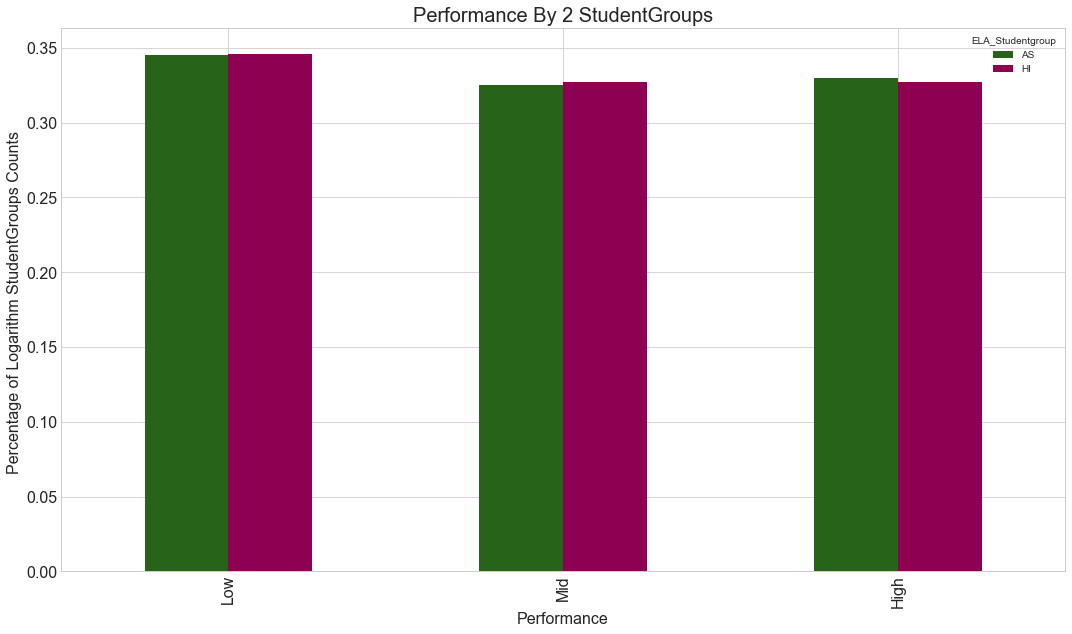

In [48]:
plt.figure()
stdgrp_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(18,10))
plt.title('Performance By 2 StudentGroups', fontsize=20)
plt.ylabel('Percentage of Logarithm StudentGroups Counts ', fontsize=16)
plt.xlabel('Performance', fontsize=16)
plt.show()

## 6e) If have time then add CCI and ELP indicators 

## IGNORE 7) Prepare dataset for modelling  - Logistic Regression

Voice gender example 

In [49]:
new_datat2.head(2)
#IGNORE perfflg
#USE perf_flg

,cds,ELA_Schoolname,ELA_Districtname,ELA_Countyname,ELA_Studentgroup,ELA_Statuslevel,ELA_Changelevel,ELA_Color,ELA_Box,ELA_Reportingyear,...,MATH_Districtname,MATH_Countyname,MATH_Studentgroup,MATH_Statuslevel,MATH_Changelevel,MATH_Color,MATH_Box,MATH_Reportingyear,perf,label
2,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,2017f,...,Alameda County Office of Education,Alameda,ALL,2,3,2,180,2017f,Low,no
4,1100170123968,Community School for Creative Education,Alameda County Office of Education,Alameda,AA,1,1,0,0,2017f,...,Alameda County Office of Education,Alameda,EL,2,5,3,200,2017f,Mid,yes


In [50]:
new_datat2.dtypes

cds                    int64
ELA_Schoolname        object
ELA_Districtname      object
ELA_Countyname        object
ELA_Studentgroup      object
ELA_Statuslevel        int64
ELA_Changelevel        int64
ELA_Color              int64
ELA_Box                int64
ELA_Reportingyear     object
MATH_Schoolname       object
MATH_Districtname     object
MATH_Countyname       object
MATH_Studentgroup     object
MATH_Statuslevel       int64
MATH_Changelevel       int64
MATH_Color             int64
MATH_Box               int64
MATH_Reportingyear    object
perf                  object
label                 object
dtype: object

Logistic regression gives binary outcome - already converted perf_flg to binary value
since above type shows object again then convert again


In [51]:
new_datat2['label'].str.contains('yes').astype(int).head()


2     0
4     1
8     0
11    1
16    0
Name: label, dtype: int64

In [52]:
# Assign X (data) and y (target)
X = new_datat2.drop("label", axis=1)
y = new_datat2["label"]
print(X.shape, y.shape)

(577594, 20) (577594,)


 Split our data into training and testing

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

Create a Logistic Regression Model

In [54]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Fit (train) or model using the training data

In [55]:
classifier.fit(X_train, y_train)

ValueError: could not convert string to float: 'Low'

 Validate the model using the test data

In [ ]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Make predictions

In [ ]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [ ]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

## If have time run a Linear Regression on Color and Stautslevel - Childhood Respiratory Disease example 

In [ ]:
# Hot Encode Perf variable using Pandas get_dummies to convert categorical data 
#for Linear Regression below  - 5 min

### BEGIN SOLUTION
new_datat3 = pd.get_dummies(new_datat2)

### END SOLUTION

In [ ]:
new_datat3.head(2)

In [ ]:
new_datat3.dtypes
#may not be needed

## Student example

### 7) Train/Test dataset prep 

In [ ]:
# Extract 
new_datat2lin = new_datat2.loc[:, ["cds", "ELA_Statuslevel", "ELA_Changelevel", 
        "ELA_Color", "ELA_Box", "MATH_Statuslevel", "MATH_Changelevel", "MATH_Color", 
        "MATH_Box", "perf", "perf_High", "perf_Low", "perf_Mid", "label"]]
new_datat2lin.head(3)

In [ ]:
new_datat2lin.tail()

In [ ]:
# look for missing values
new_datat2lin.isnull().any()

In [ ]:
# Hot Encode Perf variable using Pandas get_dummies to convert categorical data 
#for Linear Regression below  - 5 min

### BEGIN SOLUTION
new_datat2lin3 = pd.get_dummies(new_datat2lin)

new_datat2lin3.head(3)
### END SOLUTION

In [ ]:
new_datat2lin3.shape

In [ ]:
# create dataframe class_df for classification
class_df = new_datat2.copy()
class_df = class_df.drop([ 'ELA_Color'], axis=1)

In [ ]:
#label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
class_df.perf = le.fit_transform(class_df.perf)

In [ ]:
# dataset train_test_split
from sklearn.cross_validation import train_test_split
X = class_df.drop('perf',axis=1)
y = class_df.perf
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:

# see total number of features
##14120 - kernel was restarting for DT/RF modelling
len(list(X_train))

### 7a) Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

 Fit (train) or model using the training data

# Q-Hitting kernal restarting

In [ ]:
classifier.fit(X_train, y_train)

 Validate the model using the test data

In [ ]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Make predictions

In [ ]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [ ]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

# Q-hitting kernal restarting
### 7b) Decision Tree/Random Forest 

In [ ]:
# TRY LAST BECAUSE KERNEL ALWAYS RESTARTS - From Stu_trees example
from sklearn import tree

clf_dt = tree.DecisionTreeClassifier()
#clf_dt = clf_dt.fit(X_train, y_train)
#clf_dt.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(n_estimators=200)
rf = RandomForestClassifier(n_estimators=10)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

In [ ]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

## 7c)Stochastic Gradient Descent Classification

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sf = sgd.fit(X_train, y_train)
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , sf.score(X_test, y_test))

In [ ]:
#RUN ABOVE

## Childhood respiratory disease 

In [ ]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
##Age', 'Height'
X = new_datat2lin3[['cds', 'ELA_Statuslevel', 'ELA_Changelevel', 'ELA_Color', 'ELA_Box',
                'MATH_Statuslevel', 'MATH_Changelevel', 'MATH_Color', 'MATH_Box','perf'
               'label_no', 'label_yes' ]]
y = new_datat2lin3["FEV"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION